In [4]:
import pandas as pd
import numpy as np, warnings, itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from math import sqrt

warnings.simplefilter("ignore")


from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

PROPHET

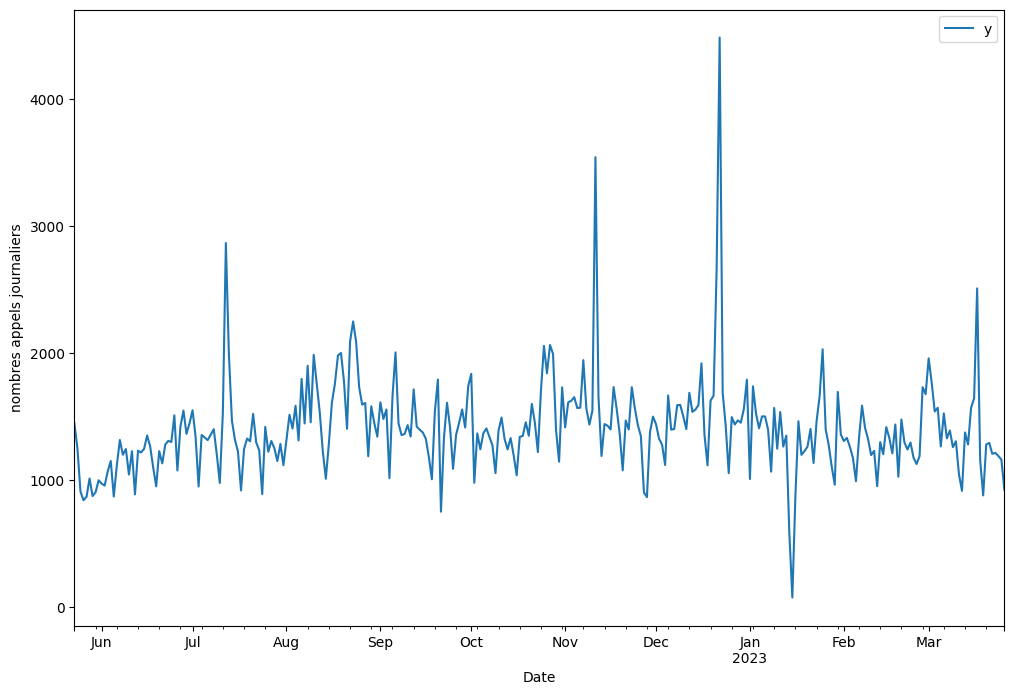

' train_df = data.iloc[:250,:]\ntest_df = data.iloc[250:,:]\nprint(test_df) '

In [5]:
import numpy as np
import itertools as intertools
import pandas as pd
import matplotlib.pyplot as plt
import prophet as Prophet
from sklearn.metrics import mean_squared_error,r2_score
import math
import time
import statsmodels.api as sm
%matplotlib inline



# Charger le fichier CSV
df_data = pd.read_csv("journalier.csv")

""" # get datetime and calls volume
df_data = df[['date','nombre_appels']].copy()

# convert to datetime """

df_data['date'] = pd.to_datetime(df_data['date'])

# set index

""" df_data.set_index('date', inplace=True) """

df_data['date'] = pd.DatetimeIndex(df_data['date'])

data = df_data.rename(columns = {'date':'ds','nombre_appels':'y'})
""" print(data) """
ax = data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('nombres appels journaliers')
ax.set_xlabel('Date')
plt.show()







""" train_df = data.iloc[:250,:]
test_df = data.iloc[250:,:]
print(test_df) """

In [13]:
# Initiate the model
baseline_model = Prophet.Prophet()
# Fit the model on the training dataset
baseline_model.fit(data)

baseline_model_cv = cross_validation(model=baseline_model, initial='200 days', period='7 days', horizon = '7 days', parallel="processes")
baseline_model_cv.tail()


# Model performance metrics
baseline_model_p = performance_metrics(baseline_model_cv, rolling_window=1)
baseline_model_p.head()

13:10:39 - cmdstanpy - INFO - Chain [1] start processing
13:10:39 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,174952.334176,418.273038,247.324473,0.307068,0.119312,0.172107,0.904762


In [17]:
# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.05, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 10, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet.Prophet(**params).fit(data)  
    # Cross-validation
    df_cv = cross_validation(m, initial='200 days', period='7 days', horizon = '7 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print(best_params)

13:15:03 - cmdstanpy - INFO - Chain [1] start processing
13:15:03 - cmdstanpy - INFO - Chain [1] done processing
13:15:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
13:15:03 - cmdstanpy - INFO - Chain [1] start processing
13:15:04 - cmdstanpy - INFO - Chain [1] done processing
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] done processing
13:15:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] done processing
13:15:06 - c

{'changepoint_prior_scale': 0.08, 'seasonality_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


In [20]:
# Fit the model using the best parameters
auto_model = Prophet.Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model.fit(data)
# Cross validation
auto_model_cv = cross_validation(auto_model, initial='200 days', period='7 days', horizon = '7 days', parallel="processes")
# Model performance metrics
auto_model_p = performance_metrics(auto_model_cv, rolling_window=1)
print(auto_model_p)

13:19:21 - cmdstanpy - INFO - Chain [1] start processing
13:19:21 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1]

  horizon            mse        rmse         mae      mape     mdape  \
0  7 days  174486.271418  417.715539  239.205392  0.291739  0.110418   

      smape  coverage  
0  0.166575  0.885714  
